## DATA620 Project 2##

**PART 1**- Dataset

I will use this malaria dataset. [http://danlarremore.com/bipartiteSBM/]

**PART 2**- Reduce the size of the network.

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
G = nx.Graph()
G = nx.read_weighted_edgelist("malaria.edgelist", delimiter="\t", comments="%")

Basic graph information:

In [22]:
len(nx.nodes(G))

1103

In [23]:
nx.number_of_edges(G)

2965

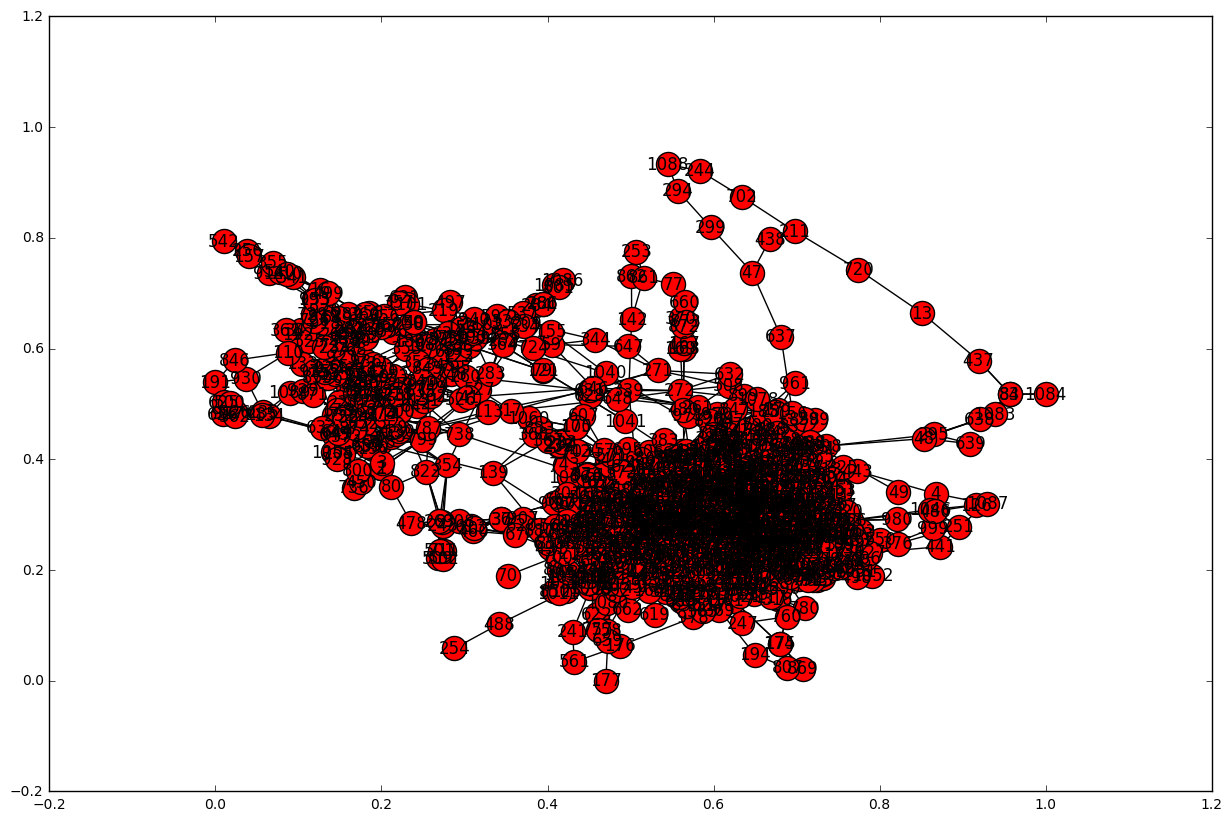

In [24]:
plt.figure(figsize=(15,10))
nx.draw_networkx(G)
plt.show()

A messy grpah but there appears to be one large cluster and perhpas two smaller ones. I will project this bipartite graph onto just the gene nodes and graph the results.

In [25]:
# list of gene nodes for projection
import csv
glist = []
with open('genes.csv', 'rb') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        glist.append(row)
glist = [item for sublist in glist for item in sublist]

In [26]:
from networkx.algorithms import bipartite as bi
B = bi.weighted_projected_graph(G, glist, ratio=False)
weights = [edata['weight'] for f,t,edata in B.edges(data=True)]

In [27]:
len(nx.nodes(B))

297

In [28]:
nx.number_of_edges(B)

3010

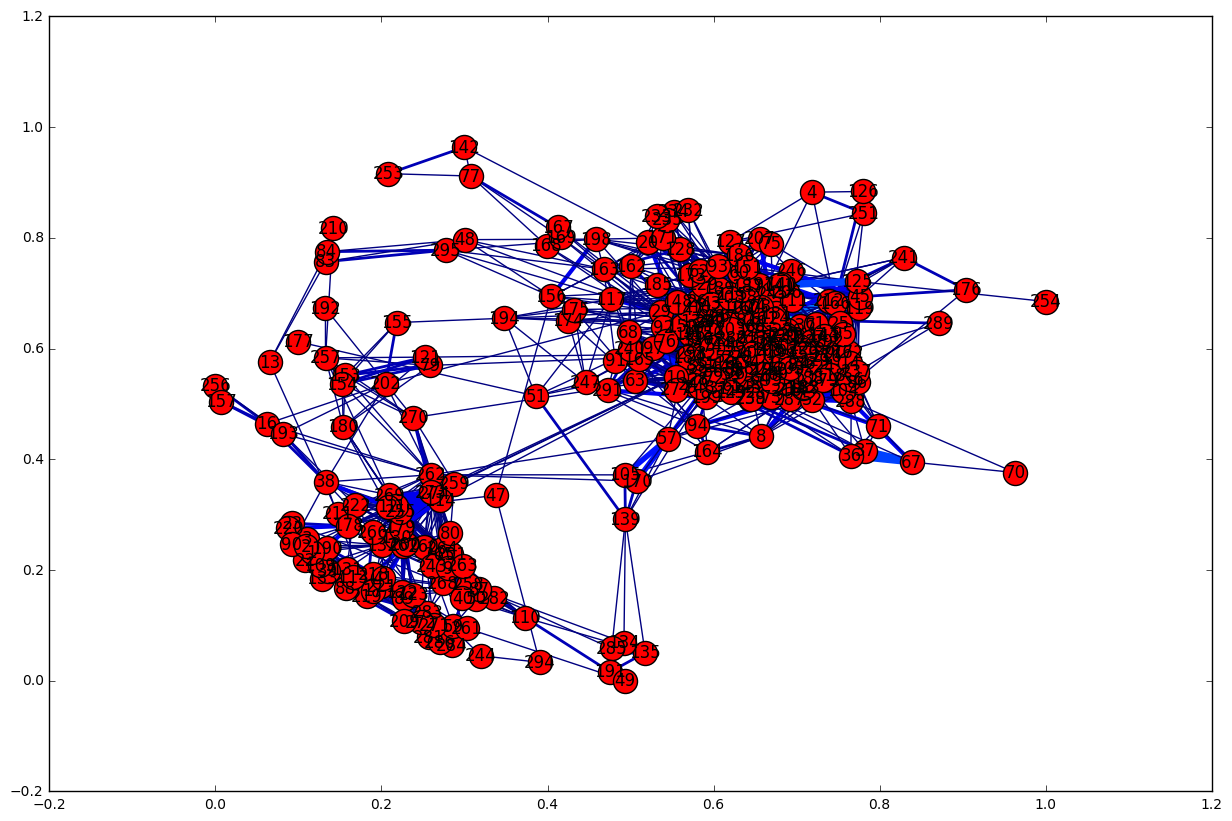

In [29]:
plt.figure(figsize = (15,10))
nx.draw_networkx(B, width=weights, edge_color=weights)

Again , there is one large cluster and two smaller ones. I will try to reduce the network by using the island method to trim edges. Edge weight in this network is the number of common substrings between gene nodes.

In [30]:
def trim_edges(g, weight=1): 
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True): 
        if edata['weight'] > weight:
            g2.add_edge(f,to,edata)
    return g2

In [31]:
def island_method(g, iterations=5):
    weights = [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn = int(min(weights))
    mx = int(max(weights))
    step = int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [32]:
islands = island_method(B)
for i in islands:
    print i[0], len(i[1])

1 279
5 135
9 61
13 23
17 8
21 2


The network shrinks dramatically. I will trim edges up to 13 connections, which leaves us with a more manageable number of nodes.

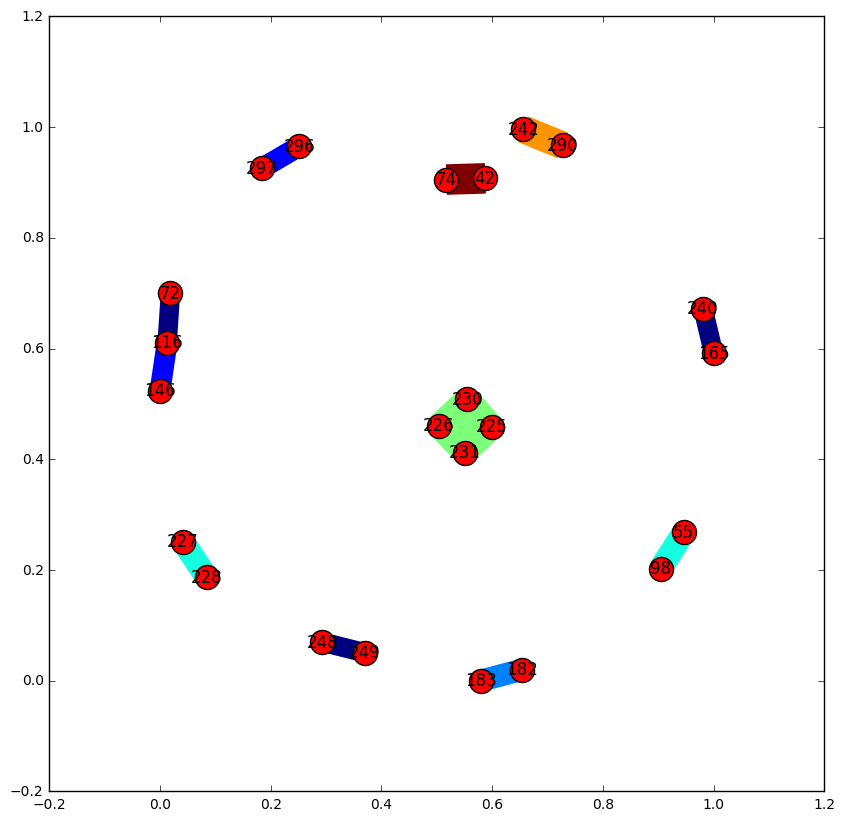

In [33]:
B2 = trim_edges(B, 13)
plt.figure(figsize = (10,10))
weights = [edata['weight'] for f,t,edata in B2.edges(data=True)]
nx.draw_networkx(B2, width=weights, edge_color=weights)

**PART 3**- Inference

The 23 nodes are split into 10 distinct groups, mostly dyads and triads. I could further reduce the network, but the properties are clear enough. We see that there is a large amount of genetic diverity and exchange between parasites. This explains the lack of an effective malaria vaccine.